# Capítulo 2: Fancy Tricks with Simple Numbers

### Bibliotecas básicas e outros imports

In [1]:
import json
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
np.set_printoptions(suppress=True, precision=3)

## Binarização

### Carregamento dos dados

In [2]:
listen_count = pd.read_csv('./datasets/train_triplets.txt', header=None, delimiter='\t')
print(listen_count.shape)
listen_count.head()

(48373586, 3)


,0,1,2
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


### Visualizando a contagem de escutas

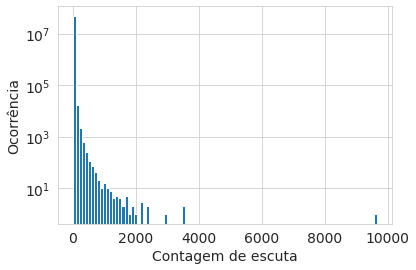

In [3]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
listen_count[2].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Contagem de escuta', fontsize=14)
ax.set_ylabel('Ocorrência', fontsize=14)
plt.show()

### Binarizando contagens de escuta no conjunto de dados de milhões de músicas

In [4]:
#Apenas contagens diferentes de zero são incluídas. 
#Para binarizar a contagem, precisamos apenas definir a coluna como 1
listen_count[2] = 1
listen_count.head(1)

,0,1,2
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1


## Quantização ou Binning

### Carregamento dos dados

In [5]:
biz_file = open('./datasets/archive/yelp_academic_dataset_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()

print(biz_df.shape)
biz_df.head()

(160585, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


### Visualizando contagens de resenhas de negócios

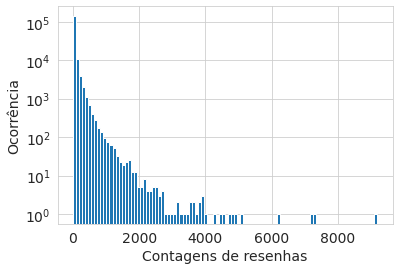

In [6]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Contagens de resenhas', fontsize=14)
ax.set_ylabel('Ocorrência', fontsize=14)
plt.show()

### Binning de largura fixa

In [13]:
small_counts = np.random.randint(0, 100, 20)
print(small_counts)
# Mapeie para caixas com espaçamento uniforme 0-9 por divisão
np.floor_divide(small_counts, 10)

[93 94 62 44 18 25 92 41 81 46 59  0 74 75 75 24  1 15 62 92]


array([9, 9, 6, 4, 1, 2, 9, 4, 8, 4, 5, 0, 7, 7, 7, 2, 0, 1, 6, 9])

In [11]:
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]
# Mapeie para caixas de largura exponencial por meio da função de registro
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

### Bining de quantis

> Os quantis dividem os dados ordenados em q subconjuntos de dados de dimensão essencialmente igual. Ex.: Os 100-quantis são chamados percentis e os 4-quantis são chamados quartis.

In [17]:
#Mapeie as contagens para quartis
pd.qcut(large_counts, 4, labels=False)

array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3])

In [18]:
# Calcule os próprios quantis
large_counts_series = pd.Series(large_counts)
large_counts_series.quantile([0.25, 0.5, 0.75])

0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64

Calculando decis das contagens de avaliações de negócios do Yelp

In [14]:
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

0.1      6.0
0.2      7.0
0.3      9.0
0.4     12.0
0.5     17.0
0.6     24.0
0.7     35.0
0.8     57.0
0.9    117.0
Name: review_count, dtype: float64

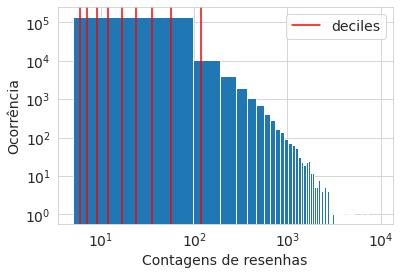

In [16]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)

for pos in deciles:
    handle = plt.axvline(pos, color='r')
    ax.legend([handle], ['deciles'], fontsize=14)

ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Contagens de resenhas', fontsize=14)
ax.set_ylabel('Ocorrência', fontsize=14)
plt.show()